In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor



# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
upload = files.upload()

Saving cardata.csv to cardata.csv


In [ ]:
import pandas as pd
df = pd.read_csv('cardata.csv')
df.shape

(301, 9)

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,NaN,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071.0,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796.0,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429.0,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273.0,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367.0,Diesel,Dealer,Manual,0


In [ ]:
df.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [ ]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       2
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [ ]:
print(df.isna().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [ ]:
print(df.notnull())


     Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0        True  True           True           True        True       True   
1        True  True           True           True        True       True   
2        True  True           True           True        True       True   
3        True  True           True           True        True       True   
4        True  True           True           True        True       True   
..        ...   ...            ...            ...         ...        ...   
296      True  True           True           True        True       True   
297      True  True           True           True        True       True   
298      True  True           True           True        True       True   
299      True  True           True           True        True       True   
300      True  True           True           True        True       True   

     Seller_Type  Transmission  Owner  
0           True          True   True  
1      

In [ ]:
print(df.describe())

              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [ ]:
#DATA CLEANING
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
final_dataset['Current Year']=2022

In [ ]:
print(final_dataset.head())

   Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0  2014           3.35           5.59         NaN    Petrol      Dealer   
1  2013           4.75           9.54     43000.0    Diesel      Dealer   
2  2017           7.25           9.85      6900.0    Petrol      Dealer   
3  2011           2.85           4.15      5200.0    Petrol      Dealer   
4  2014           4.60           6.87     42450.0    Diesel      Dealer   

  Transmission  Owner  Current Year  
0       Manual      0          2022  
1       Manual      0          2022  
2       Manual      0          2022  
3       Manual      0          2022  
4       Manual      0          2022  


In [ ]:
final_dataset['no_year']=final_dataset['Current Year'] - final_dataset['Year']
#adding variable "no_year" to the dataset which gives no of years of the car i.e. subtract
final_dataset.drop(['Year'],axis=1,inplace=True)
#dropping year column from the dataset which is of no use as we calculated no of years
final_dataset=final_dataset.drop(['Current Year'],axis=1)
#dropping current year from the column which is of no use as we calculated no of years
final_dataset=pd.get_dummies(final_dataset,drop_first=True)
#to convert categorical features into one hot encoded as there are less no of categories a
print(final_dataset.head())

   Selling_Price  Present_Price  Kms_Driven  Owner  no_year  Fuel_Type_Diesel  \
0           3.35           5.59         NaN      0        8                 0   
1           4.75           9.54     43000.0      0        9                 1   
2           7.25           9.85      6900.0      0        5                 0   
3           2.85           4.15      5200.0      0       11                 0   
4           4.60           6.87     42450.0      0        8                 1   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                 1                       0                    1  
1                 0                       0                    1  
2                 1                       0                    1  
3                 1                       0                    1  
4                 0                       0                    1  


In [ ]:
final_dataset.corr() #to find the correlation between the variables present in the final_
print(final_dataset.corr())

                        Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.827845   -0.094800 -0.098519   
Present_Price                0.827845       1.000000    0.257153  0.030423   
Kms_Driven                  -0.094800       0.257153    1.000000  0.174416   
Owner                       -0.098519       0.030423    0.174416  1.000000   
no_year                     -0.341245       0.062845    0.706615  0.144661   
Fuel_Type_Diesel             0.462027       0.362776    0.218948 -0.056737   
Fuel_Type_Petrol            -0.443113      -0.348656   -0.218213  0.059456   
Seller_Type_Individual      -0.105612      -0.015256    0.210572  0.359313   
Transmission_Manual         -0.449377      -0.419764   -0.137212 -0.093799   

                         no_year  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price          -0.341245          0.462027         -0.443113   
Present_Price           0.062845          0.362776         -0.348656   
Kms

In [ ]:
bikes = []
for i in range(len(final_dataset)):
  if final_dataset['Present_Price'][i] < 2.0:
    bikes.append(1)
  else:
    bikes.append(0)
final_dataset['Bike'] = bikes
# DROPPING COLUMNS WHICH HAVE BIKE =1
final_dataset.drop(final_dataset[(final_dataset['Bike'] == 1)].index, inplace=True)
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Bike
0,2014,3.35,5.59,NaN,Petrol,Dealer,Manual,0,2022,0
1,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0,2022,0
2,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0,2022,0
3,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0,2022,0
4,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0,2022,0
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988.0,Diesel,Dealer,Manual,0,2022,0
297,2015,4.00,5.90,60000.0,Petrol,Dealer,Manual,0,2022,0
298,2009,3.35,11.00,87934.0,Petrol,Dealer,Manual,0,2022,0
299,2017,11.50,12.50,9000.0,Diesel,Dealer,Manual,0,2022,0


In [ ]:
final_dataset = final_dataset.drop(['Bike'],axis=1)


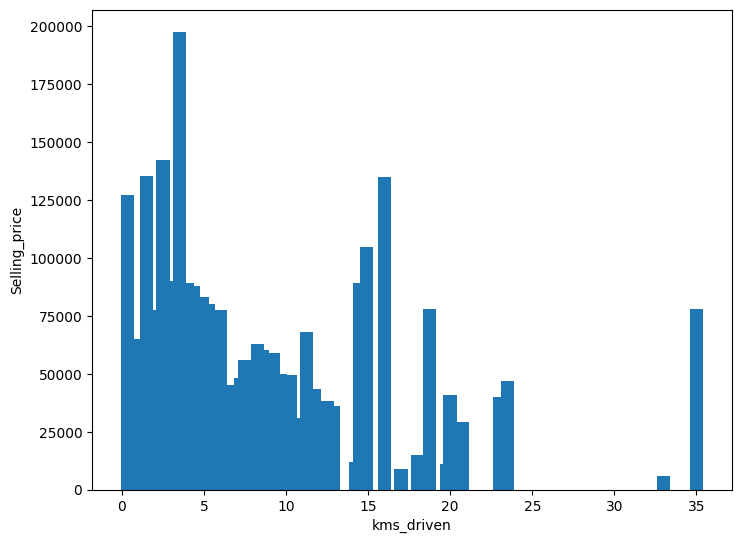

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Xplot = final_dataset['Selling_Price']
Yplot = final_dataset['Kms_Driven']
ax.bar(Xplot,Yplot)
ax.set_ylabel('Selling_price')
ax.set_xlabel('kms_driven')
plt.show()

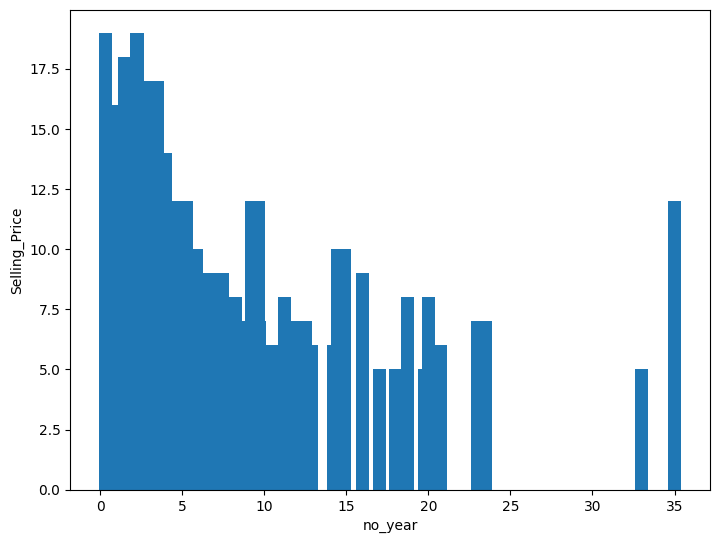

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Yplot = final_dataset['no_year']
Xplot = final_dataset['Selling_Price']
ax.bar(Xplot,Yplot)
ax.set_ylabel('Selling_Price')
ax.set_xlabel('no_year')
plt.show()


In [ ]:
corrmat = final_dataset.corr() #taking final_dataset.corr() as variable "corrmat"
top_corr_features = corrmat.index #gives the index of the variable corrmat
X=final_dataset.iloc[:,1:] #independent features
y=final_dataset.iloc[:,0] #dependent features
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,NaN,0,8,0,1,0,1
1,9.54,43000.0,0,9,1,0,0,1
2,9.85,6900.0,0,5,0,1,0,1
3,4.15,5200.0,0,11,0,1,0,1
4,6.87,42450.0,0,8,1,0,0,1


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
final_dataset.shape

(203, 9)

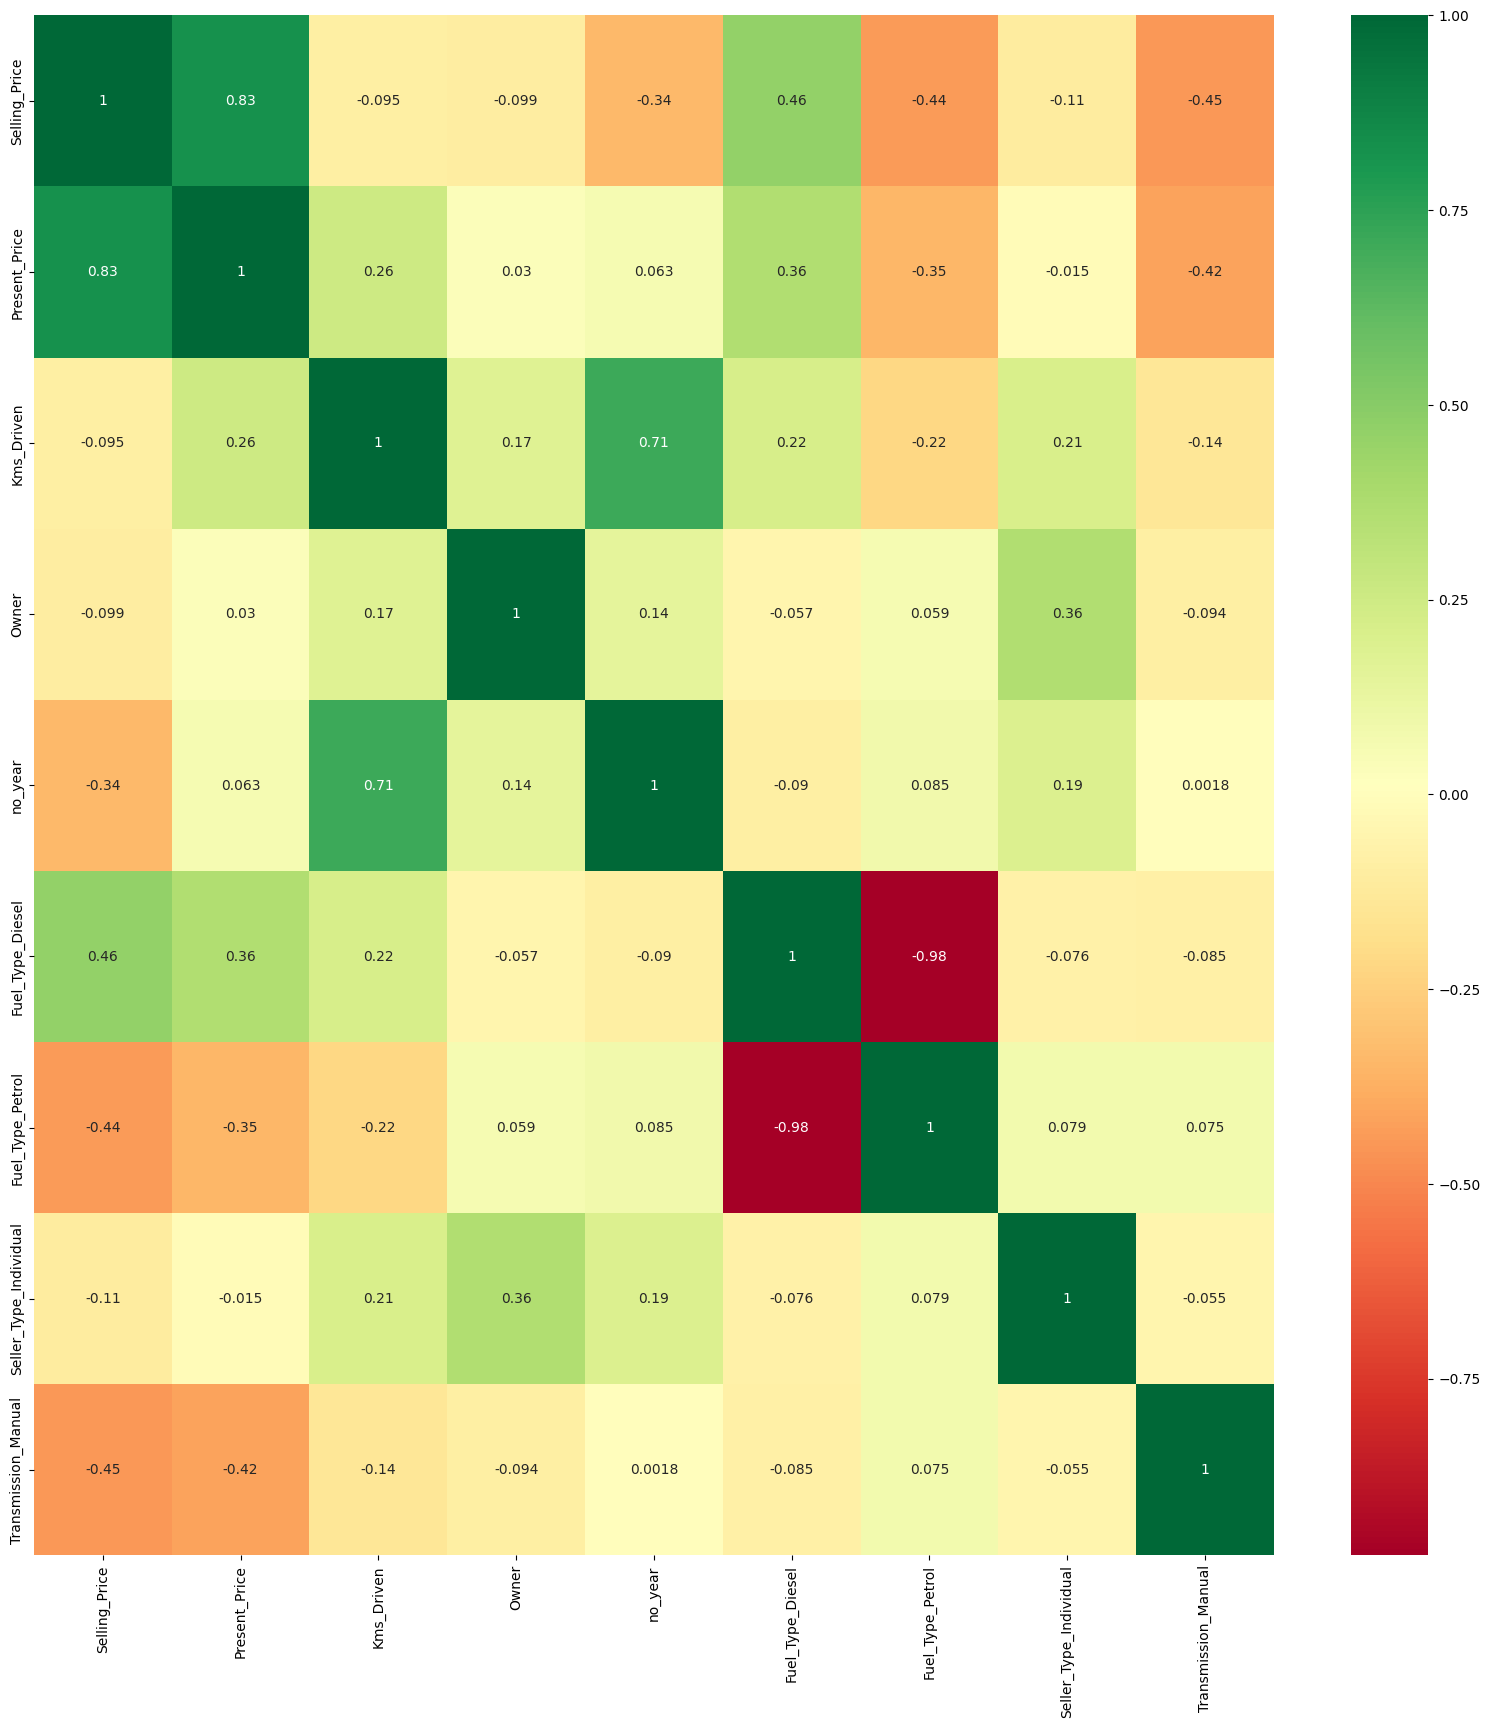

In [ ]:
plt.figure(figsize=(20,20)) #for adjusting the heat map figure size
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

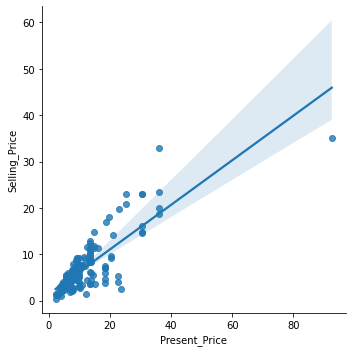

In [ ]:
sns.lmplot(x = 'Present_Price', y = 'Selling_Price', data = final_dataset)


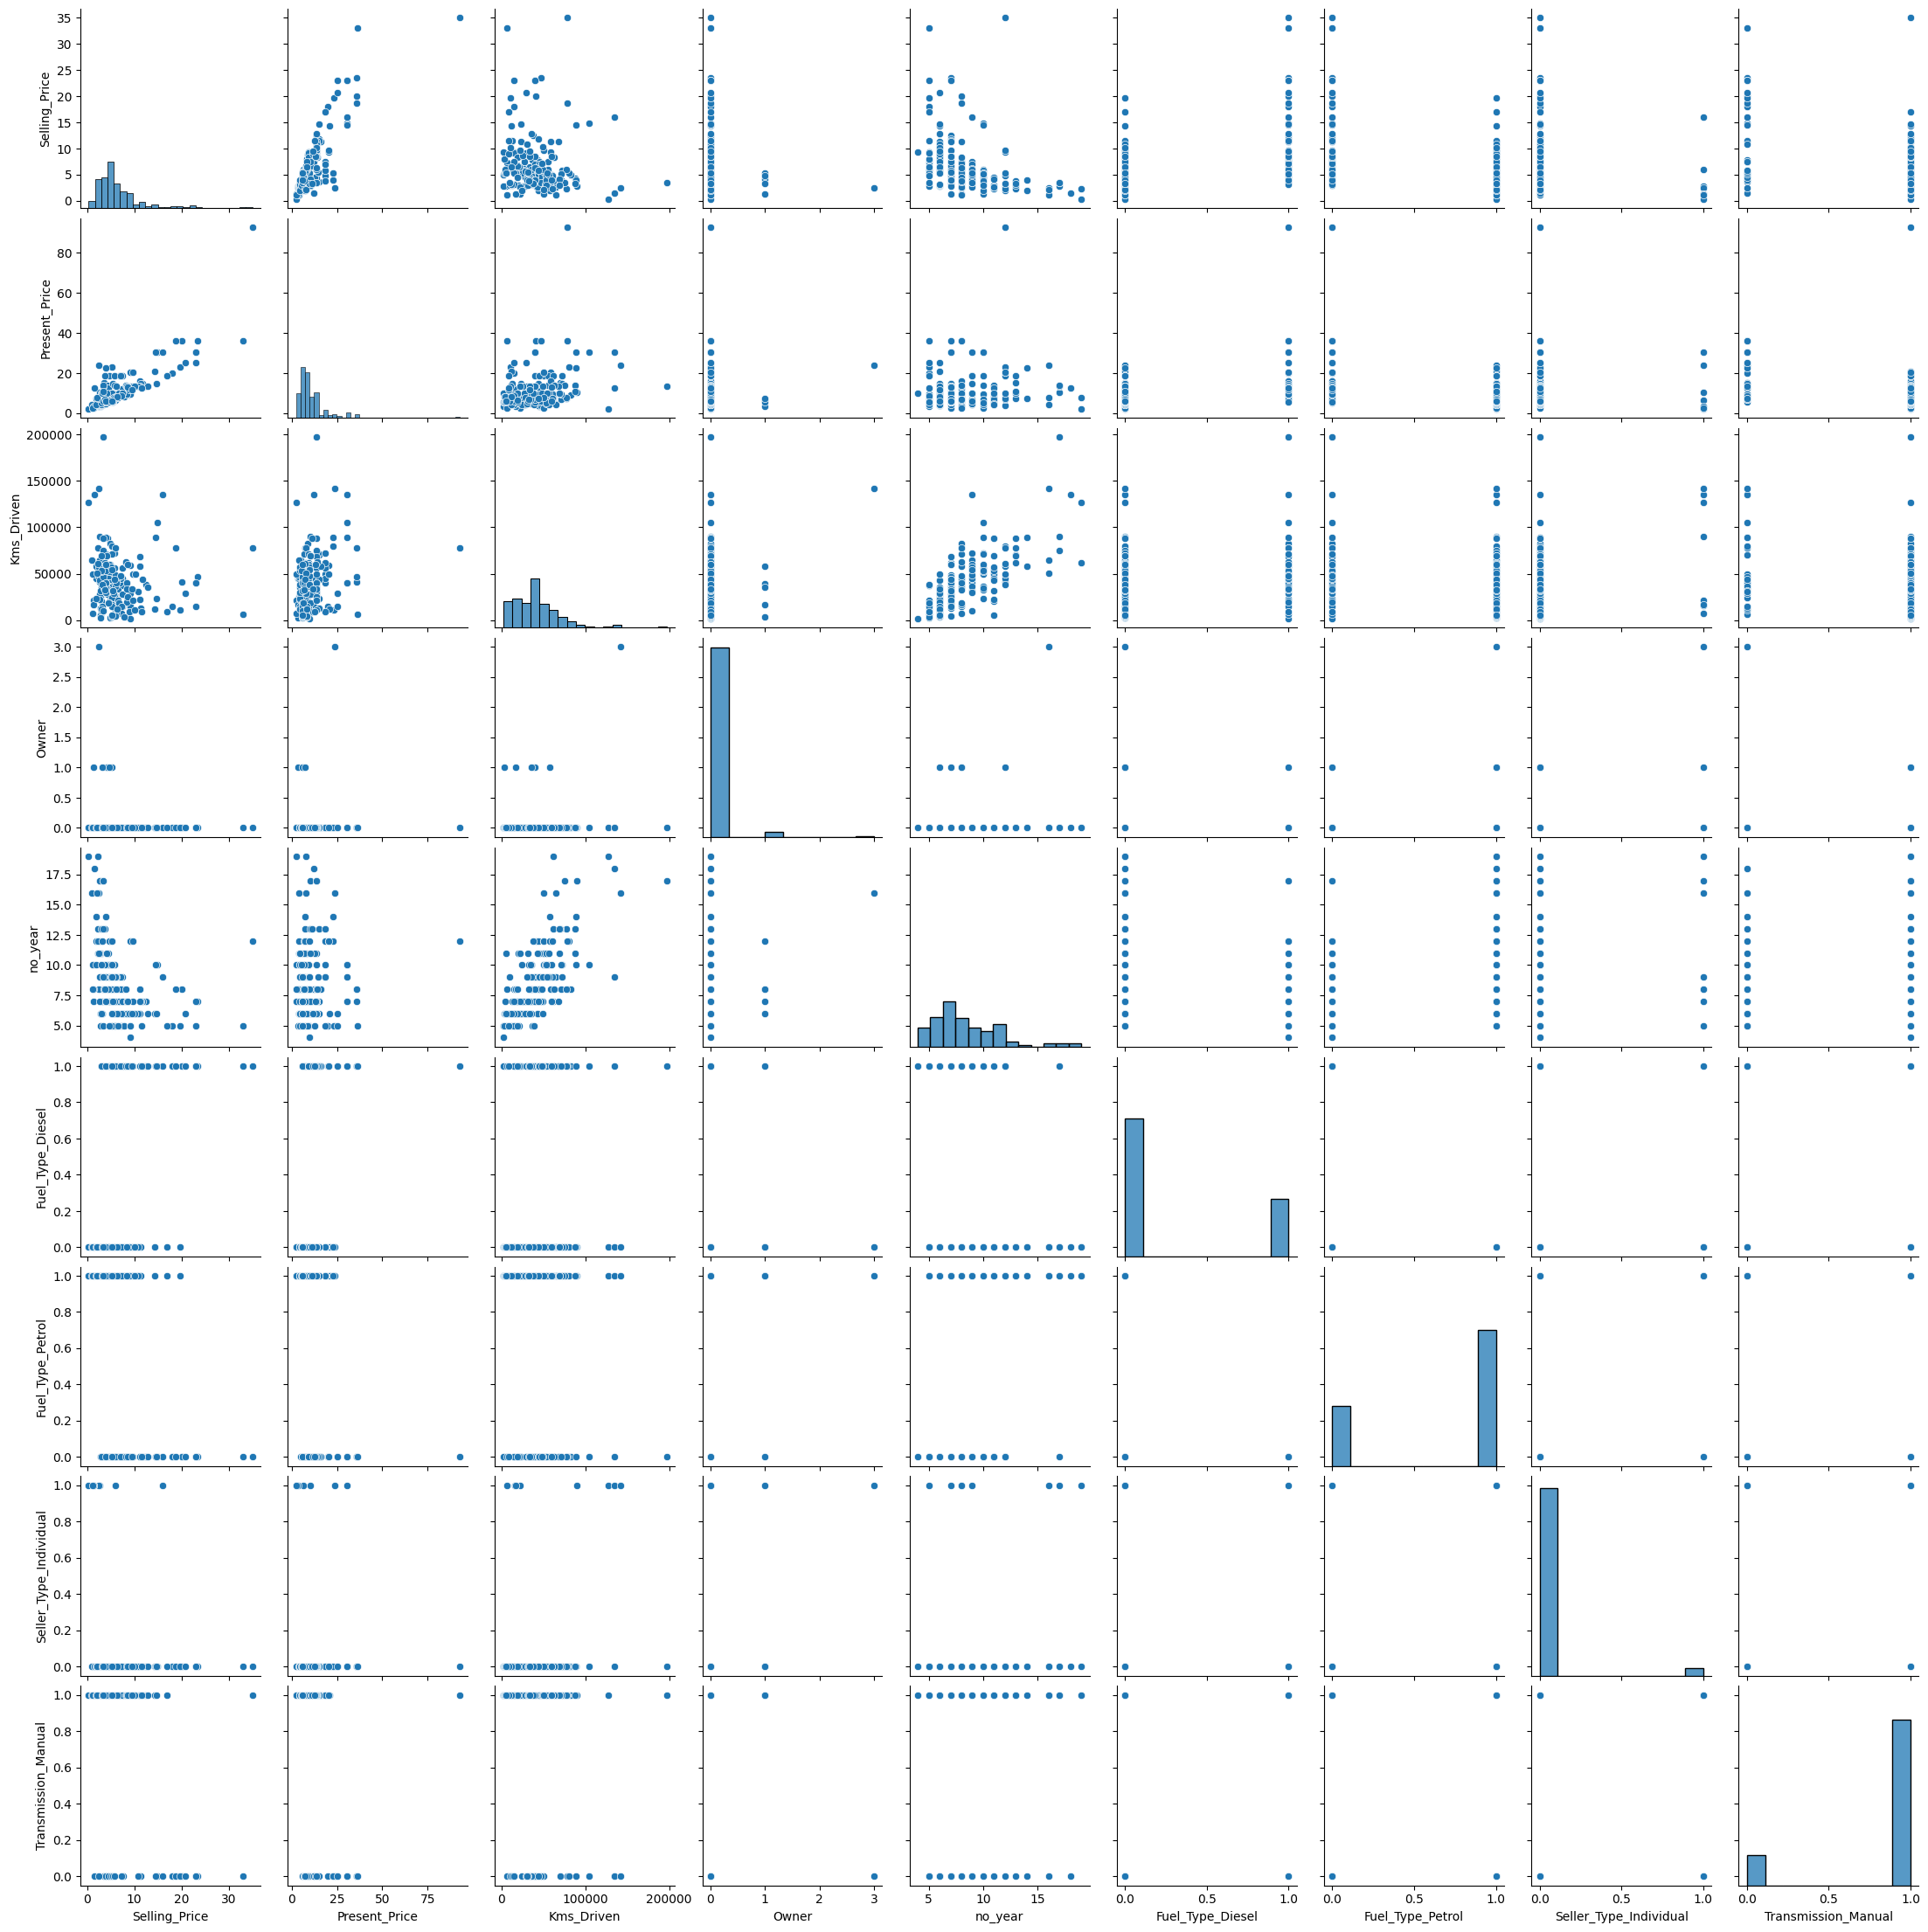

In [ ]:
sns.pairplot(final_dataset) #gives the pairplot of the final_dataset

In [ ]:
X.head()

,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,NaN,0,8,0,1,0,1
1,9.54,43000.0,0,9,1,0,0,1
2,9.85,6900.0,0,5,0,1,0,1
3,4.15,5200.0,0,11,0,1,0,1
4,6.87,42450.0,0,8,1,0,0,1


In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape) #prints the size of the training data

(162, 8)


In [ ]:
#RANDOM FOREST REGRESSION
rf_random=RandomForestRegressor()
rf_random.fit(X_test,y_test) #for fitting the model to the training data set
predictions=rf_random.predict(X_test)
print(predictions)

[ 3.5205  7.3715  6.293   0.9425  4.574   6.1103  9.4842  5.463   7.559
  5.5835  4.868   3.9005  4.1645  8.2026  6.684   6.797   2.435   3.3305
  3.9805 19.0681  1.587   6.0515 22.1043  3.8135 29.4563  2.4135  7.7897
  6.6548  4.054  20.518   5.6214  7.8391  7.127   5.408  12.1785  4.3655
  5.0035 15.1617  4.4765  9.4342  7.2785]


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) #for printing the value
print('MSE:', metrics.mean_squared_error(y_test, predictions)) #for printing the value o
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) #for printing t
r2 = r2_score(y_test,predictions) #for finding the R-squared value
print('r2 score for the model is', r2) #for printing the R-squared value
errors = abs(predictions - y_test) #for finding the error
mape = np.mean(100 * (errors / y_test)) #for finding mean absolute percentage error
accuracy_3= 100 - mape #for finding the accuracy of the model
print('Accuracy:',accuracy_3, '%') #for printing the accuracy of the model
adj_rt = 1 - (1-rf_random.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape)
print('Adjusted R squared',adj_rt)
sns.distplot(y_test-predictions)
#Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test,predictions)


MAE: 0.6290902439024375
MSE: 1.3136299929268263
RMSE: 1.1461369869814106
r2 score for the model is 0.9703846514455262
Accuracy: 87.49127759965884 %


ValueError: ignored

<ipython-input-40-e978f8e61cf0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")


NameError: ignored

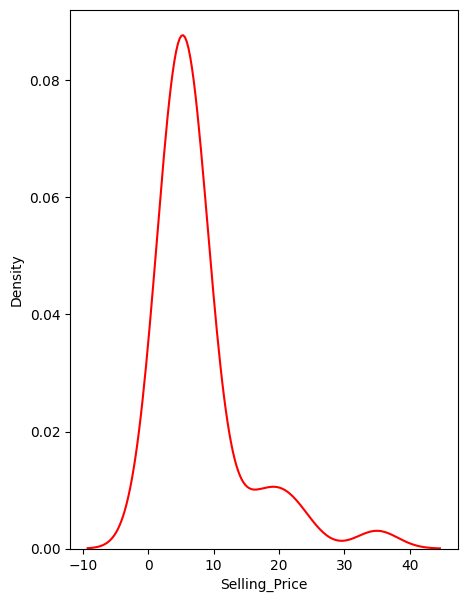

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()